PT
double qprofile(double R) {
 if (R < 2.0964850030268) return 15.151605846395 * R + -28.909851290037;
 if (R >= 2.0964850030268 && R < 2.1071293075566) return 17.175103153703 * R + -33.152083048474;
 if (R >= 2.1071293075566 && R < 2.117726224718) return 19.46607295286 * R + -37.979452655005;
 if (R >= 2.117726224718 && R < 2.1282757545111) return 22.0208229163 * R + -43.38971365018;
 if (R >= 2.1282757545111 && R < 2.1387778969358) return 24.835677189783 * R + -49.380499752915;
 if (R >= 2.1387778969358 && R < 2.1492326519922) return 27.906976394957 * R + -55.949326607818;
 if (R >= 2.1492326519922 && R < 2.1596400196803) return 31.231077627803 * R + -63.093593515977;
 if (R >= 2.1596400196803 && R < 2.17) return 34.804354458275 * R + -70.810585160462;
 if (R >= 2.17 && R < 2.1803125929514) return 38.623196931768 * R + -79.097473327942;
 if (R >= 2.1803125929514 && R < 2.1905777985344) return 42.684011567091 * R + -87.951318614978;
 if (R >= 2.1905777985344 && R < 2.2007956167491) r

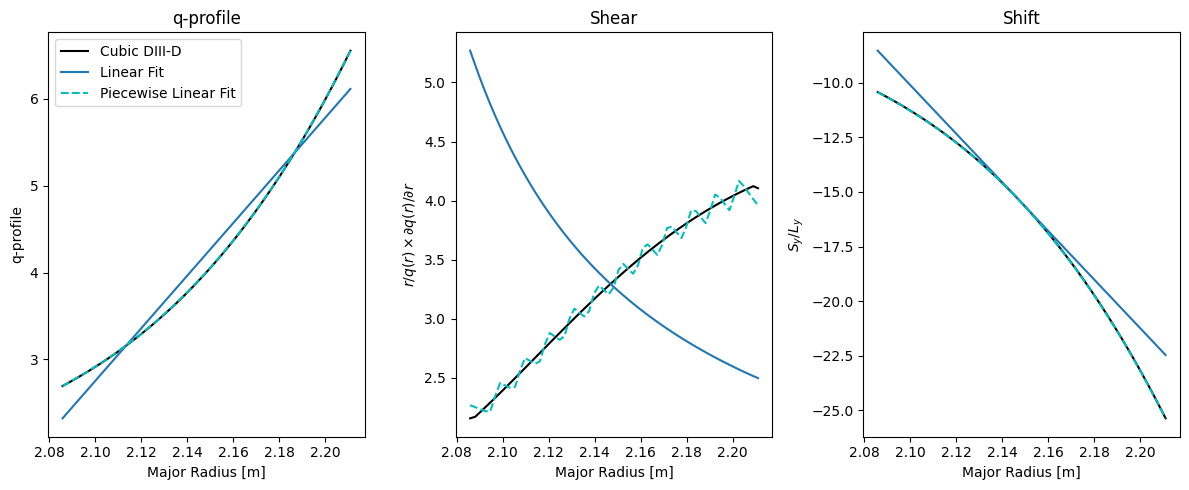

NT
double qprofile(double R) {
 if (R < 2.1085272042972) return 14.897163568072 * R + -28.949381285597;
 if (R >= 2.1085272042972 && R < 2.1175835614774) return 15.907453815265 * R + -31.079605756039;
 if (R >= 2.1175835614774 && R < 2.1265484089167) return 16.983238370414 * R + -33.357669445714;
 if (R >= 2.1265484089167 && R < 2.1354217466151) return 18.122223978463 * R + -35.779777478291;
 if (R >= 2.1354217466151 && R < 2.1442035745727) return 19.322140675435 * R + -38.342105687131;
 if (R >= 2.1442035745727 && R < 2.1528938927893) return 20.58074178595 * R + -41.040802687258;
 if (R >= 2.1528938927893 && R < 2.1614927012651) return 21.895803924916 * R + -43.871991934876;
 if (R >= 2.1614927012651 && R < 2.17) return 23.265126996881 * R + -46.831773760603;
 if (R >= 2.17 && R < 2.178415788994) return 24.686534196574 * R + -49.916227383937;
 if (R >= 2.178415788994 && R < 2.1867400682471) return 26.157872008182 * R + -53.121412903686;
 if (R >= 2.1867400682471 && R < 2.1949728377594

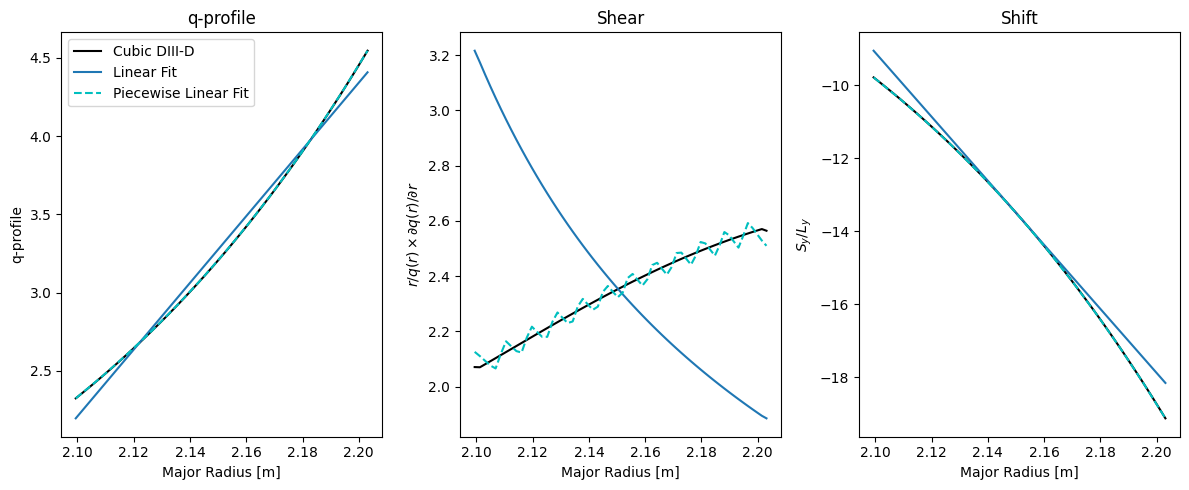

rho_min_PT =  0.990075711069163
rho_min_NT =  0.8576262343013842


In [8]:
import numpy as np
import matplotlib.pyplot as plt

Npieces = 12
Nx = 60

class Context:
    def __init__(self, a_shift, Z_axis, R_axis, B_axis, R_LCFSmid, x_inner, x_outer, delta, Nx):
        self.a_shift = a_shift
        self.Z_axis = Z_axis
        self.R_axis = R_axis
        self.B_axis = B_axis
        self.R_LCFSmid = R_LCFSmid
        self.x_inner = x_inner
        self.x_outer = x_outer
        self.Rmid_min = R_LCFSmid - x_inner
        self.Rmid_max = R_LCFSmid + x_outer
        self.R0 = 0.5 * (self.Rmid_min + self.Rmid_max)
        self.a_mid = R_LCFSmid - R_axis
        self.a_mid = R_axis / a_shift - np.sqrt(R_axis * (R_axis - 2 * a_shift * R_LCFSmid + 2 * a_shift * R_axis)) / a_shift
        self.r0 = self.R0 - R_axis
        self.Lx = self.Rmid_max - self.Rmid_min
        self.x_min = 0.0
        self.x_max = self.Lx
        self.Ly = 0.2
        self.Lz = 2.0 * np.pi - 1e-10
        self.Nx = Nx
        self.delta = delta

    def r_x(self, x):
        return x + self.a_mid - self.x_inner

def qprofile_D3D_PT(r, ctx):
    y = Rrtheta(r, ctx)
    a, b, c, d = 407.582626469394, -2468.613680167604, 4992.660489790657, -3369.710290916853
    return (a*y**3 + b*y**2 + c*y + d)

def qprofile_D3D_NT(r, ctx):
    y = Rrtheta(r, ctx)
    a, b, c, d = 154.51071835546747,  -921.8584472748003, 1842.1077075366113, -1231.619813170522
    return (a*y**3 + b*y**2 + c*y + d)

def shear(r, qprof, ctx):
    q = qprof(r, ctx)
    dqdr = np.gradient(q, r)
    return (r/q) * dqdr

def shift(x, qprofile, ctx):
    x0 = 0.5 * (ctx.x_min + ctx.x_max)
    r0 = ctx.r_x(x0)
    q0 = qprofile(r0, ctx)
    r = ctx.r_x(x)
    return -ctx.r0 / q0 * qprofile(r, ctx) * ctx.Lz

def Rrtheta(r, ctx):
    return ctx.R_axis - ctx.a_shift*r*r/(2.*ctx.R_axis) + r*np.cos(0 + np.arcsin(ctx.delta)*np.sin(0))

def fit_qprofiles(r, R, qprofile_func, Npieces, ctx):
    qprofile = qprofile_func(r, ctx)
    qfit_lin = np.polyfit(R, qprofile, 1)
    qfit_quad = np.polyfit(R, qprofile, 2)
    qfit_cub = np.polyfit(R, qprofile, 3)
    def qfit_lin_func(r, ctx):
        y = Rrtheta(r, ctx) #r + ctx.R_axis
        return qfit_lin[0] * y + qfit_lin[1]
    def qfit_quad_func(r, ctx):
        y = Rrtheta(r, ctx)
        return qfit_quad[0] * y**2 + qfit_quad[1] * y + qfit_quad[2]
    def qfit_cub_func(r, ctx):
        y = Rrtheta(r, ctx)
        return qfit_cub[0] * y**3 + qfit_cub[1] * y**2 + qfit_cub[2] * y + qfit_cub[3]
    qfit_piecewise = np.zeros((Npieces, 2))
    for i in range(Npieces):
        x1 = i * (ctx.x_max - ctx.x_min) / Npieces
        x2 = (i + 1) * (ctx.x_max - ctx.x_min) / Npieces
        r1 = ctx.r_x(x1)
        r2 = ctx.r_x(x2)
        R1 = Rrtheta(r1, ctx)
        R2 = Rrtheta(r2, ctx)
        q1 = qprofile_func(r1, ctx)
        q2 = qprofile_func(r2, ctx)
        qfit_piecewise[i, 0] = (q2 - q1) / (R2 - R1)
        qfit_piecewise[i, 1] = q1 - qfit_piecewise[i, 0] * R1
    def qfit_piecewise_func(r, ctx):
        if isinstance(r, float): 
            r = np.array([r])
        y = Rrtheta(r, ctx)
        fit = np.zeros_like(y)
        for i in range(len(y)):
            for j in range(Npieces):
                x1 = j * (ctx.x_max - ctx.x_min) / Npieces
                x2 = (j + 1) * (ctx.x_max - ctx.x_min) / Npieces
                R1 = Rrtheta(ctx.r_x(x1),ctx)
                R2 = Rrtheta(ctx.r_x(x2),ctx)
                if y[i] >= R1 and y[i] <= R2:
                    fit[i] = qfit_piecewise[j, 0] * y[i] + qfit_piecewise[j, 1]
        return fit
    return qprofile, qfit_lin_func, qfit_quad_func, qfit_cub_func, qfit_piecewise_func, qfit_lin, qfit_quad, qfit_cub, qfit_piecewise

def print_piecewise_c_code(qfit_piecewise, Npieces, ctx):
    print("double qprofile(double R) {")
    for i in range(Npieces):
        x1 = i * (ctx.x_max - ctx.x_min) / Npieces
        x2 = (i + 1) * (ctx.x_max - ctx.x_min) / Npieces
        r1 = ctx.r_x(x1)
        r2 = ctx.r_x(x2)
        R1 = Rrtheta(r1, ctx)
        R2 = Rrtheta(r2, ctx)
        if i == 0:
            print(" if (R < %.14g) return %.14g * R + %.14g;" % (R2, qfit_piecewise[i, 0], qfit_piecewise[i, 1]))
        elif i == Npieces - 1:
            print(" if (R >= %.14g) return %.14g * R + %.14g;" % (R1, qfit_piecewise[i, 0], qfit_piecewise[i, 1]))
        else:
            print(" if (R >= %.14g && R < %.14g) return %.14g * R + %.14g;" % (R1, R2, qfit_piecewise[i, 0], qfit_piecewise[i, 1]))
    print("}")

def plot_qprofile_comparison(R, r, x, qprofile, qprofile_func, qfit_lin_func, qfit_quad_func, qfit_cub_func, qfit_piecewise_func, ctx):
    fig, ax = plt.subplots(1, 3, figsize=(12, 5))
    ax[0].plot(R, qprofile, '-k', label='Cubic DIII-D')
    ax[0].plot(R, qfit_lin_func(r, ctx), '-', label='Linear Fit')
    ax[0].plot(R, qfit_piecewise_func(r, ctx), '--c', label='Piecewise Linear Fit')
    ax[0].set_xlabel('Major Radius [m]')
    ax[0].set_ylabel('q-profile')
    ax[0].set_title('q-profile')
    shear_original = shear(r, qprofile_func, ctx)
    shear_linear = shear(r, qfit_lin_func, ctx)
    ax[1].plot(R, shear_original, '-k')
    ax[1].plot(R, shear_linear, '-')
    ax[1].plot(R, shear(r, qfit_piecewise_func, ctx), '--c')
    ax[1].set_xlabel('Major Radius [m]')
    ax[1].set_ylabel(r'$r/q(r) \times \partial q(r)/\partial r$')
    ax[1].set_title('Shear')
    shift_original = shift(x, qprofile_func, ctx)/ctx.Ly
    shift_linear = shift(x, qfit_lin_func, ctx)/ctx.Ly
    ax[2].plot(R, shift_original, '-k')
    ax[2].plot(R, shift_linear, '-')
    ax[2].plot(R, shift(x, qfit_piecewise_func, ctx)/ctx.Ly, '--c')
    ax[2].set_xlabel('Major Radius [m]')
    ax[2].set_ylabel(r'$S_y/L_y$')
    ax[2].set_title('Shift')
    ax[0].legend()
    plt.tight_layout()
    plt.show()

def run_qprofile_workflow(ctx, qprofile_func):
    x = np.linspace(ctx.x_min, ctx.x_max, ctx.Nx)
    r = ctx.r_x(x)
    R = Rrtheta(r, ctx)
    qprofile, qfit_lin_func, qfit_quad_func, qfit_cub_func, qfit_piecewise_func, qfit_lin, qfit_quad, qfit_cub, qfit_piecewise = fit_qprofiles(r, R, qprofile_func, Npieces, ctx)
    print_piecewise_c_code(qfit_piecewise, Npieces, ctx)
    plot_qprofile_comparison(R, r, x, qprofile, qprofile_func, qfit_lin_func, qfit_quad_func, qfit_cub_func, qfit_piecewise_func, ctx)

# PT context and workflow
ctx_PT = Context(
    a_shift=0.5,
    Z_axis=0.013055028,
    R_axis=1.6486461,
    B_axis=2.0,
    R_LCFSmid=2.17,
    x_inner=0.10,
    x_outer=0.05,
    delta = 0.4,
    Nx=Nx
)
print("PT")
run_qprofile_workflow(ctx_PT, qprofile_D3D_PT)

# NT context and workflow
ctx_NT = Context(
    a_shift=1.0,
    Z_axis=-0.0014645315,
    R_axis=1.7074685,
    B_axis=2.0,
    R_LCFSmid=2.17,
    x_inner=0.10,
    x_outer=0.05,
    delta = -0.4,
    Nx=Nx
)
print("NT")
run_qprofile_workflow(ctx_NT, qprofile_D3D_NT)
## Use r instead of R for qprofile

print("rho_min_PT = ", (Rrtheta(ctx_PT.r_x(30/48*0.15), ctx_PT) - ctx_PT.R_axis)/ (ctx_PT.R_LCFSmid - ctx_PT.R_axis))
print("rho_min_NT = ", (Rrtheta(ctx_NT.r_x(0.0065), ctx_NT) - ctx_NT.R_axis)/ (ctx_NT.R_LCFSmid - ctx_NT.R_axis))
